In [358]:
# Author: Konstantin Borissov
# Course: STAT 251, UBC
# Date:   18-Nov-2020
# Purpose: Interactive visualization tool for confidence intervals, test statistics, and hypothesis testing

In [ ]:
%pip install matplotlib numpy scipy ipywidgets;

In [332]:
%matplotlib notebook

In [333]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact

In [334]:
mpl.rcParams['savefig.dpi'] = 60
mpl.rcParams['figure.dpi'] = 60

## 1. Hypothesis testing with unknown population mean $\mu$ and _known_ population standard deviation $\sigma$.
### Where the population has a normal distribution, or the sample size is large enough that, by the CLT, the sample mean will approach a normal distribution.

For two-tailed test, where the null and alternate hypotheses are:   
$H_0: \mu = \mu_0$  
$H_a: \mu \neq \mu_0$

Given a sample size of $n$, sample mean $\bar{x}$, _known_ population standard deviation $\sigma$, and a significance level of $\alpha$:  

The test statistic: $$z=\frac{\bar{x} - \mu_0}{\left(\sigma/\sqrt{n}\right)}\sim N(0,1)$$  
  
Confidence Interval: $$\bar{x} \pm z_{\left(1-\frac{\alpha}{2}\right)} \cdot \frac{\sigma}{\sqrt{n}} 
= \left[ 
    \bar{x} - z_{\left(1-\frac{\alpha}{2}\right)} \cdot \frac{\sigma}{\sqrt{n}},\quad
    \bar{x} + z_{\left(1-\frac{\alpha}{2}\right)} \cdot \frac{\sigma}{\sqrt{n}} 
 \right]$$  
 
 which gives the $(1-\alpha)\cdot 100\%$ interval.

Click the run symbol on left side to start simulation

<IPython.core.display.Javascript object>


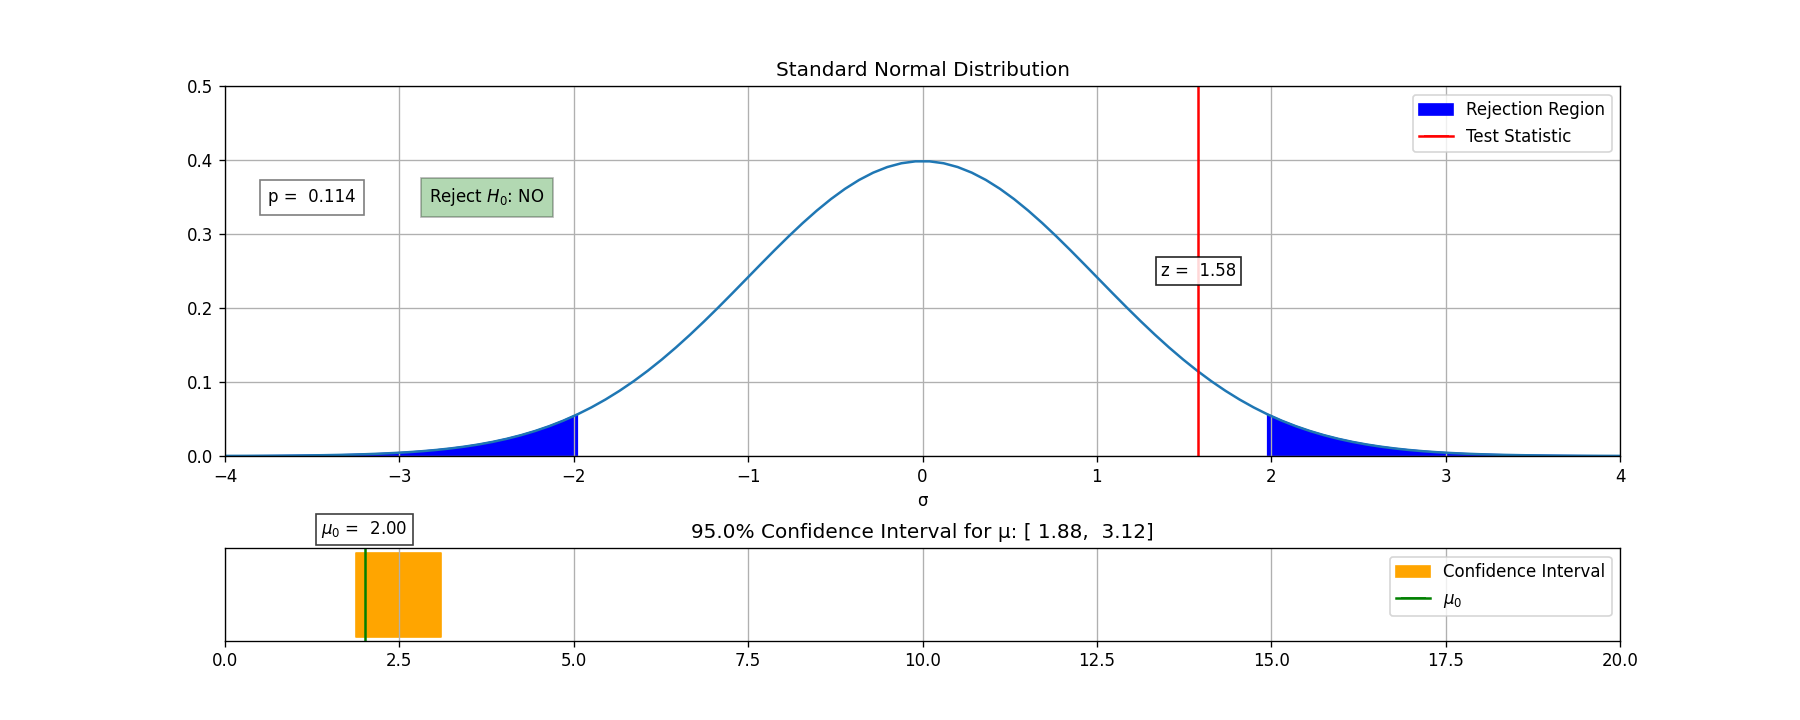

interactive(children=(FloatSlider(value=2.5, description='xbar', max=5.0), FloatSlider(value=1.0, description=…

In [357]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6), gridspec_kw={'height_ratios': [4, 1]})
ax1.set_ylim([0,0.5])
ax1.set_xlim([-4,4])
ax1.grid(True)
plt.subplots_adjust(hspace = 0.4)
ax2.set_xlim([0, 20])
ax2.grid(True)

# create legend symbols
rejection_region_patch = mpatches.Patch(color='blue', label='Rejection Region')
test_statistic_line = mlines.Line2D([], [], color='red', marker='_', markersize=15, label='Test Statistic')
ci_marker = mpatches.Patch(color='orange', label='Confidence Interval')
mu_0 = mlines.Line2D([], [], color='green', marker='_', markersize=15, label='$μ_0$')

# create legends
ax1.legend(handles=[rejection_region_patch, test_statistic_line])
ax2.legend(handles=[ci_marker, mu_0])

# set labels
ax2.yaxis.set_visible(False)
ax1.set_title("Standard Normal Distribution")
ax1.set_xlabel("σ")
#ax2.set_xlabel("μ")

# generate x values
x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 20, 1000)

rejection_region = None
reject_label = None
test_stat_label = None
mu_0_label = None
p_label = None

# create normal pdf for specified values
std_normal_pdf = stats.norm.pdf(x, 0, 1)

def get_ci_ts(xbar, sigma, sample_size, alpha, mu_0):
    # calculate statistics
    z = stats.norm.ppf(1 - alpha/2)
    standard_error = sigma/np.sqrt(sample_size)
    ci_min = xbar - z*standard_error
    ci_max = xbar + z*standard_error
    test_stat = (xbar-mu_0)/(sigma/np.sqrt(sample_size))
    reject_h0 = (test_stat < -z) | (test_stat > z)
    p_val = stats.norm.pdf(test_stat)
    
    # update data printout
    print(f'{(1-alpha)*100}% Confidence Interval: [{ci_min: .2f}, {ci_max: .2f}]')
    print(f'Test Statistic = {test_stat: .2f}')
    print(f'z = {z: .2f}')
    return ci_min, ci_max, test_stat, z, reject_h0, p_val

 
@widgets.interact(xbar=(0, 5, 0.1), sigma=(0.05, 5, 0.05), sample_size=(1,100,1), alpha=(0.01,0.15,0.01), mu_0=(0, 5, 0.1))
def update_plot(xbar = 2.5, sigma=1, sample_size=10, alpha=0.05, mu_0=2):
    global rejection_region, reject_label, test_stat_label, mu_0_label, p_label
     
    # clear plot data
    ax1.lines.clear()
    ax2.lines.clear()
    if rejection_region is not None:
        ax1.collections.remove(rejection_region)
        reject_label.remove()
        test_stat_label.remove()
        mu_0_label.remove()
        ax2.collections.clear()
        p_label.remove()
    
    # get new CI and statistics
    lower_bound, upper_bound, ts, z, reject_h0, p_val = get_ci_ts(xbar, sigma, sample_size, alpha, mu_0)
    
    # update confidence interval plot
    ax2.set_title(f"{(1-alpha)*100}% Confidence Interval for μ: [{lower_bound: .2f}, {upper_bound: .2f}]")
    ci = ax2.fill_between(x2, 1, where=(lower_bound <= x2) & (x2 <= upper_bound), color="orange")
    ax2.axvline(x=mu_0, color='green') # show hypothesized mu_0
    mu_0_label = ax2.text(mu_0, 1.15, f'$μ_0$ = {mu_0: .2f}', ha='center', va='bottom',
                              bbox={'facecolor': 'white', 'alpha': 0.75, 'pad': 3})
    
    # update normal distribution plot
    rejection_region = ax1.fill_between(x, std_normal_pdf, where=(x < -z) | (z < x), color='blue')
    ax1.plot(x, std_normal_pdf, color='C0')
    ax1.axvline(x=ts, color='red')
    test_stat_label = ax1.text(ts, 0.25, f'z = {ts: .2f}', ha='center', va='center',
                              bbox={'facecolor': 'white', 'alpha': 0.85, 'pad': 3})
    
    
    # update h_0 rejection status and p value
    reject_text = f"Reject $H_0$: {'YES' if reject_h0 else 'NO'}" 
    text_bg_color = 'red' if reject_h0 else 'green'
    print(reject_text)
    reject_label = ax1.text(-2.5, 0.35, reject_text, style='normal', ha='center', va='center', 
                            bbox={'facecolor': text_bg_color, 'alpha': 0.3, 'pad': 5})
    p_label = ax1.text(-3.5, 0.35, f'p = {p_val: .3f}', style='normal', ha='center', va='center', 
                            bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})